# Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")
import netCDF4 as nc
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr    
import glob
import os
import cartopy.crs as ccrs
import matplotlib.colors as colors
import pandas as pd
import datetime
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math
from string import ascii_lowercase
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [4]:
cmap1 = plt.cm.get_cmap('YlOrRd', 15)
cmap2 = plt.cm.get_cmap('coolwarm', 10)
cmap3 = plt.cm.get_cmap('magma_r', 20)

HWX_list =["HWF_EHF","HWD_EHF","HWT_EHF","HWC"]
HWX_list_2 =["HWF (days)","HWD (days)","HWT (calendar day)",'HWC ($^o$C)']

numlist=[0,1,2,3]
land_sea = xr.open_dataset("/g/data/w97/sl7808/landmask_accessESM1-5_AUS.nc").sftlf


    
def plot_spec(nn):
    ax[nn].coastlines()
    ax[nn].set_title('') 
    ax[nn].set_ylabel('')
    ax[nn].set_xlabel('')






# Plot

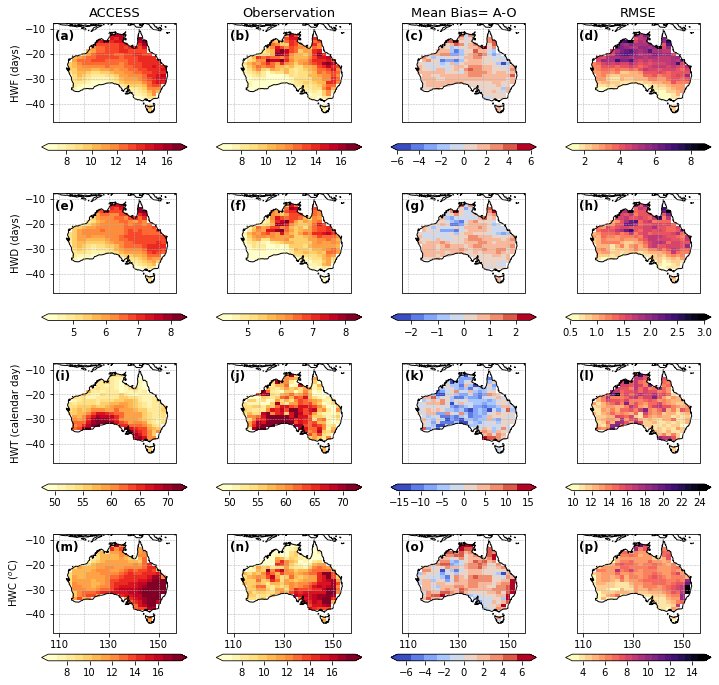

In [5]:



fig, axs = plt.subplots( figsize=(12,12)) 

ax={}

for i in range(16):
      ax[i] = plt.subplot(4,4,i+1,projection=ccrs.PlateCarree())
        

    
for h,n,h2 in zip (HWX_list,numlist,HWX_list_2):
                               
#OBServation - O
    num=4*n+1
    d = ("/g/data/w97/sl7808/ALLOUTPUT/EHF_obs/new/"+h+".nc") 
    d1=xr.open_dataset(d, decode_times=False)
    d2=d1[h]
    O=d2.mean(dim='time')
    obs=O
    
        

       
        
#ACCESS- A
    numA=4*n 

    d = ("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_HWX/"+h+".nc") 
    d1=xr.open_dataset(d, decode_times=False)
    ACCESS=d1[h].isel(time=slice(60,163))
    A= ACCESS.mean(dim='time').mean(dim="ensemble")
    x=[]
    x.insert(-1,O)
    x.insert(-1,A)
    da=xr.concat(x, 'data')
    da5=da.quantile(0.05,dim=('lat','lon','data'))
    da95=da.quantile(0.95,dim=('lat','lon','data'))
    o=O.where(land_sea>60).plot(ax=ax[num],cmap=cmap1,vmax=da95,vmin=da5, add_colorbar=False) 
    p=A.where(land_sea>60).plot(ax=ax[numA],cmap=cmap1,vmax=da95,vmin=da5, add_colorbar=False)
    
    if numA==0:
        ticklist=[8,10,12,14,16]
    elif numA==4:
        ticklist=[4,5,6,7,8]
    elif numA==8:
        ticklist=[50,55,60,65,70]
    elif numA==12:
        ticklist=[8,10,12,14,16]    
    
    
    
    
    fig.colorbar(p, ax=ax[numA], orientation='horizontal',extend='both',ticks=ticklist)#, shrink=0.35, pad=0.2)
    fig.colorbar(o, ax=ax[num], orientation='horizontal',extend='both',ticks=ticklist)#, shrink=0.35, pad=0.2)
    
    plot_spec(num)
    plot_spec(numA)
    ax[numA].set_ylabel(h2)
    ax[numA].set_yticks([-10,-20,-30,-40], crs=ccrs.PlateCarree())


        
#bias - B
    ee=[]
    numB=4*n+2 
    for e in range(20): 
        e_1=ACCESS.isel(ensemble=e).mean(dim='time')
        b_1=e_1-O
        ee.insert(-1,b_1)
    bias=xr.concat(ee,'ensemble')


    bias_vmin=bias.quantile(0.05,dim=('lat','lon','ensemble'))
    bias_vmax=bias.quantile(0.95,dim=('lat','lon','ensemble'))
    bias_da_m=bias.mean(dim=('ensemble'))

    if abs(bias_vmin)>abs(bias_vmax):
        xn=abs(bias_vmin)
    else :
        xn=abs(bias_vmax)

    if numB==2:
        ticklist=[-6,-4,-2,0,2,4,6]
    elif numB==6:
        ticklist=[-5,-4,-3,-2,-1,0,1,2,3,4,5]
    elif numB==10:
        ticklist=[-15,-10,-5,0,5,10,15]
    elif numB==14:
        ticklist=[-6,-4,-2,0,2,4,6]

    
    
    q=bias_da_m.where(land_sea>60).plot(ax=ax[numB],label="ensemble mean",cmap=cmap2,vmax=xn,vmin=(-1*xn), add_colorbar=False)
    fig.colorbar(q, ax=ax[numB], orientation='horizontal',extend='both',ticks=ticklist)#, shrink=0.35, pad=0.2)
    plot_spec(numB)
    
    
#RMSE

    ACCESS_mean=ACCESS.mean(dim='ensemble')
    
    
    
    num3=4*n+3
    SE=(ACCESS_mean-obs)**2
    MSE=SE.mean(dim='time')
    RMSE = np.sqrt(MSE)
    
    max=RMSE.where(land_sea>60).max()
    min=RMSE.where(land_sea>60).min()

    if num3==3:
        ticklist=[2,4,6,8]
    elif num3==7:
        ticklist=[0,0.5,1,1.5,2,2.5,3]
    elif num3==11:
        ticklist=[10,12,14,16,18,20,22,24]
    elif num3==15:
        ticklist=[0,2,4,6,8,10,12,14]    
        
    r=RMSE.where(land_sea>60).plot(ax=ax[num3],vmin=min,vmax=max,cmap=cmap3, add_colorbar=False)
    fig.colorbar(r, ax=ax[num3], orientation='horizontal',extend='both',ticks=ticklist)#, shrink=0.35, pad=0.2)
    plot_spec(num3)
    

    
    

  
        
fig.suptitle('', fontsize=16)
ax[1].set_title('Oberservation', fontsize=13) 
ax[0].set_title('ACCESS', fontsize=13)
ax[2].set_title('Mean Bias= A-O', fontsize=13) 
ax[3].set_title('RMSE', fontsize=13)     




for aaa in range(0,16):
    ax[aaa].text(0.02,0.80,'(%s)' %(ascii_lowercase[aaa]),
            horizontalalignment='left',verticalalignment='bottom',
            transform = ax[aaa].transAxes,fontweight='bold', fontsize=12)
    ax[aaa].gridlines(ylocs=[-10,-20,-30,-40],draw_labels=False,
                       linewidth=0.5, linestyle='--', edgecolor='dimgrey')


for aaa in range(12,16):
    ax[aaa].set_xticks([110,130,150], crs=ccrs.PlateCarree())
    

    
